In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd

1. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvectors and eigenvalues using eigendecomposition:
 [2.84643088e+01 5.13463502e-16 1.98826602e+00] 
 [[-0.11177494 -0.81649658  0.56642713]
 [-0.58195378 -0.40824829 -0.70332292]
 [-0.80550367  0.40824829  0.42953134]]
Eigenvectors and eigenvalues using SVD:
 [2.85290037e+01 1.98936114e+00 1.98116363e-31] 
 [[-0.11159508  0.5664626  -0.81649658]
 [-0.58217708 -0.70313809 -0.40824829]
 [-0.80536724  0.4297871   0.40824829]]
Lambda:
 [[5.13463502e-16 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.98826602e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.84643088e+01]] 

Trace(A):
 30.452574846617935 

Trace(Lambda):
 30.45257484661796 

We can eliminate the component 0 because by selecting the component 0, we retain 0.0000000000000000% of the total variability


Text(0.5, 1.0, '[PC2, PC3]')

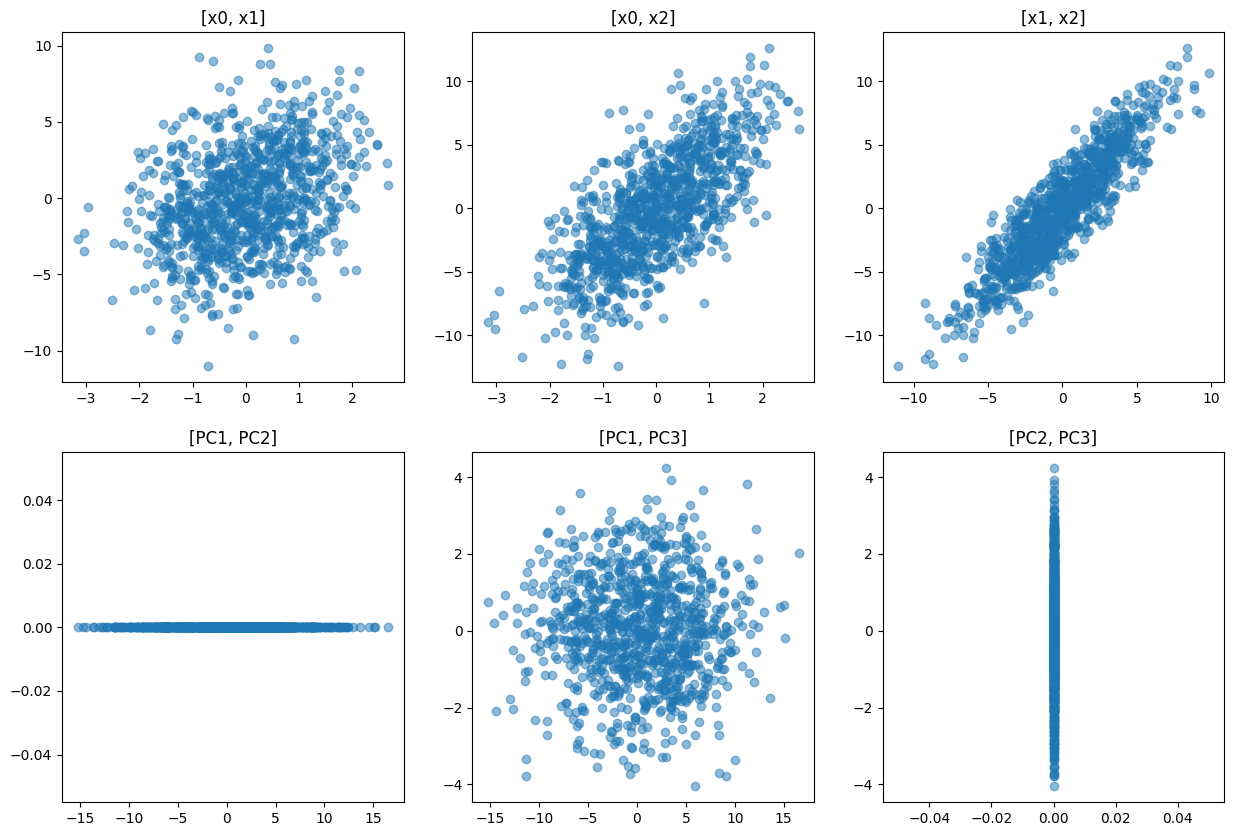

In [9]:
N = 1000 

x_1 = np.random.normal(0, 1, N)
x_2 = x_1 + np.random.normal(0, 3, N)
x_3 = 2*x_1 + x_2

dataset = np.array([x_1, x_2, x_3])
np_cov = np.cov(dataset)

# eigenvectors and eigenvalues using eigendecomposition
l_eig, v_eig = la.eig(np_cov)
l_eig = abs(l_eig)

# eigenvectors and eigenvalues using SVD
U, S, Vt = np.linalg.svd(dataset, full_matrices=False)
l_svd = S**2/(N-1)

print("Eigenvectors and eigenvalues using eigendecomposition:\n", l_eig, "\n", v_eig)
print("Eigenvectors and eigenvalues using SVD:\n", l_svd, "\n", U)

Lambda = np.diag(np.sort(l_eig))
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", np_cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("We can eliminate the component 0 because by selecting the component 0, we retain %.16f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))

v_new = np.copy(v_eig)
v_new[:, np.argmin(l_eig)] = 0
out = np.dot(dataset.T, v_new)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original basis
axes[0, 0].scatter(dataset[0], dataset[1], alpha=0.5)
axes[0, 1].scatter(dataset[0], dataset[2], alpha=0.5)
axes[0, 2].scatter(dataset[1], dataset[2], alpha=0.5)
axes[0, 0].set_title('[x0, x1]')
axes[0, 1].set_title('[x0, x2]')
axes[0, 2].set_title('[x1, x2]')

# PCA-transformed basis
axes[1, 0].scatter(out[:, 0], out[:, 1], alpha=0.5)
axes[1, 1].scatter(out[:, 0], out[:, 2], alpha=0.5)
axes[1, 2].scatter(out[:, 1], out[:, 2], alpha=0.5)
axes[1, 0].set_title('[PC1, PC2]')
axes[1, 1].set_title('[PC1, PC3]')
axes[1, 2].set_title('[PC2, PC3]')

2\. **PCA on a nD dataset**

- Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Text(0.5, 1.0, '[PC2, PC3]')

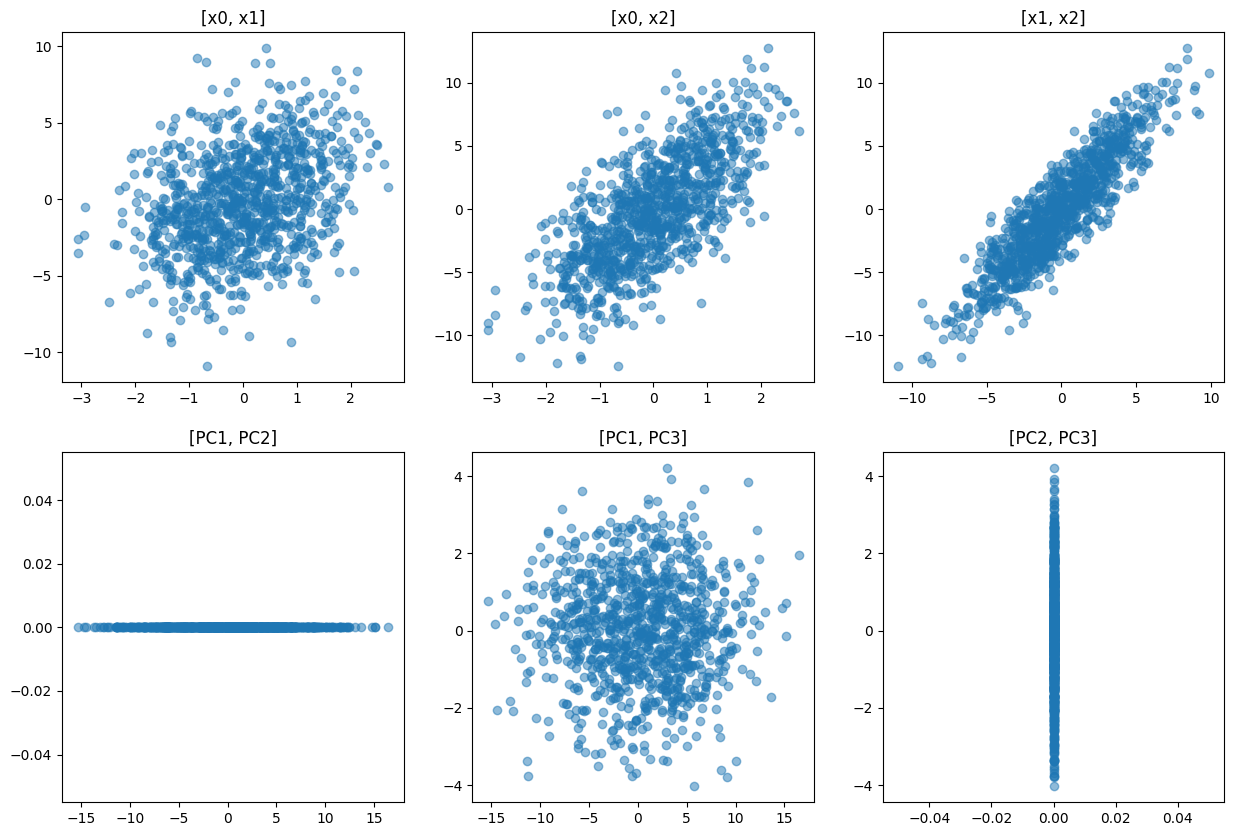

In [14]:
N = (3, 1000)

noise = np.random.normal(0, 1/20, N)
data_with_noise = dataset + noise
np_cov_2 = np.cov(data_with_noise)

# eigenvectors and eigenvalues using eigendecomposition
l_eig_2, v_eig_2 = la.eig(np_cov_2)
l_eig_2 = abs(l_eig_2)

Lambda_2 = np.diag(np.sort(l_eig_2))

v_new_2 = np.copy(v_eig_2)
v_new_2[:, np.argmin(l_eig_2)] = 0
out_2 = np.dot(data_with_noise.T, v_new_2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original basis
axes[0, 0].scatter(data_with_noise[0], data_with_noise[1], alpha=0.5)
axes[0, 1].scatter(data_with_noise[0], data_with_noise[2], alpha=0.5)
axes[0, 2].scatter(data_with_noise[1], data_with_noise[2], alpha=0.5)
axes[0, 0].set_title('[x0, x1]')
axes[0, 1].set_title('[x0, x2]')
axes[0, 2].set_title('[x1, x2]')

# PCA-transformed basis
axes[1, 0].scatter(out_2[:, 0], out_2[:, 1], alpha=0.5)
axes[1, 1].scatter(out_2[:, 0], out_2[:, 2], alpha=0.5)
axes[1, 2].scatter(out_2[:, 1], out_2[:, 2], alpha=0.5)
axes[1, 0].set_title('[PC1, PC2]')
axes[1, 1].set_title('[PC1, PC3]')
axes[1, 2].set_title('[PC2, PC3]')

# there is almost no difference from the results obtained before